In [15]:
from matplotlib import rc

import numpy as np #notwendige Pakete laden
import matplotlib.pyplot as plt
import matplotlib
import math
import matplotlib.ticker as ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator, NullLocator)
import pandas as pd
from PIL import Image
from scipy import special

In [16]:
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % ('\\mathdefault{%s}' % self.format)
    

In [17]:
@np.vectorize
def radial_bessel(X, Y):
    #return X+Y
    return np.abs(scipy.special.jn(0,np.sqrt(X**2 + Y**2)))**2

In [18]:
coord1 = np.linspace(-5, 5, 500)
coord2 = np.linspace(-5, 5, 500)

X_mesh, Y_mesh = np.meshgrid(coord1, coord2)
values = radial_bessel(X_mesh,Y_mesh)

<IPython.core.display.Javascript object>


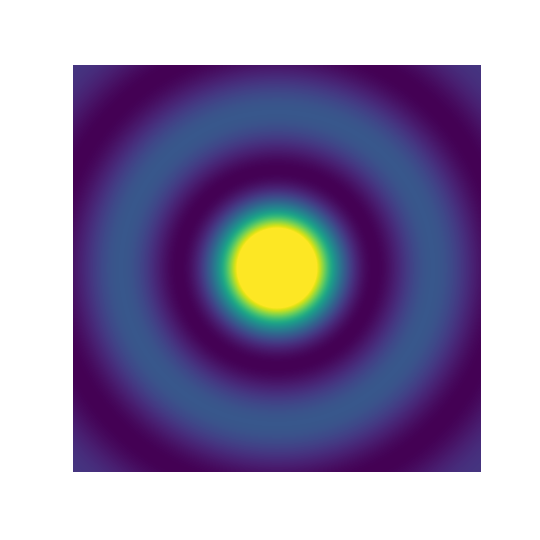

(-0.5, 499.5, 499.5, -0.5)

In [31]:
%matplotlib notebook 
plt.rcParams["figure.figsize"] = (5,5)
plt.imshow(values, vmax=0.6)
plt.axis('off')

In [32]:
plt.savefig('bessel_2d.png', bbox_inches='tight', pad_inches=0, dpi=300)